# Diamond Price Prediction - (K-NN from scratch)

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats

df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.shape

(53940, 10)

In [ ]:
# Rearraning the columns
df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z', 'price']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# EDA Analysis

## 1. Numerical Columns

1. carat
2. depth
3. table
4. x
5. y
6. z
7. price

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


### 1. **Carat**

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


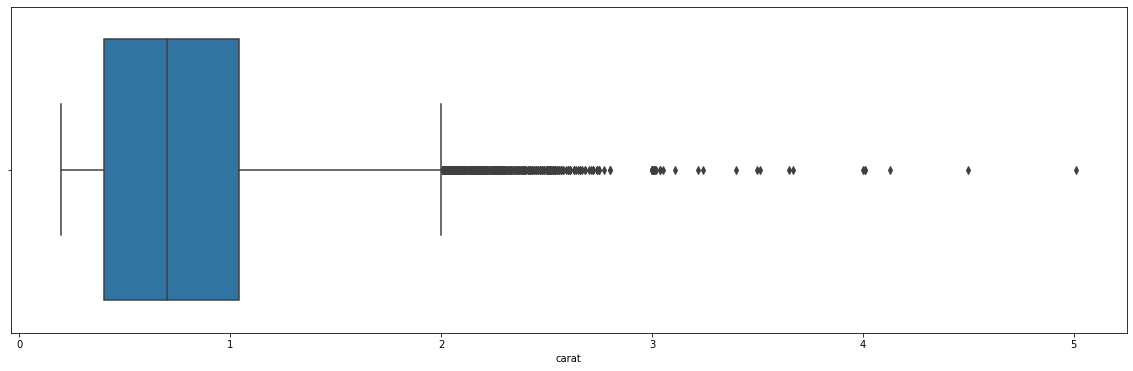

In [ ]:
plt.figure(figsize=(20,6))
sns.boxplot(df['carat'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


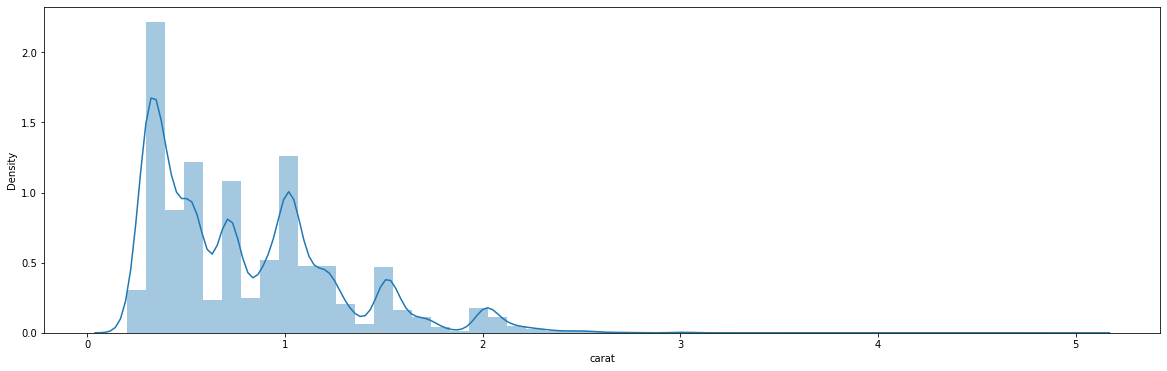

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(df['carat'])
plt.show()

In [ ]:
print('skewness = ',df['carat'].skew())
print('kurtosis = ',df['carat'].kurt())

skewness =  1.116645920812613
kurtosis =  1.2566353326079294


*2. Removing the outliers using IQR*

In [ ]:
Q1 = df['carat'].quantile(0.25)
Q3 = df['carat'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,'-',Q1,'=',IQR)

1.04 - 0.4 = 0.64


In [ ]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

(-0.5599999999999999, 2.0)

In [ ]:
df.loc[df['carat'] > upper_limit ,'carat'] = df['carat'].median()
df.loc[df['carat'] < lower_limit ,'carat'] = df['carat'].median()

In [ ]:
print('skewness = ',df['carat'].skew())
print('kurtosis = ',df['carat'].kurt())

skewness =  0.740589334550085
kurtosis =  -0.2191265177399373


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


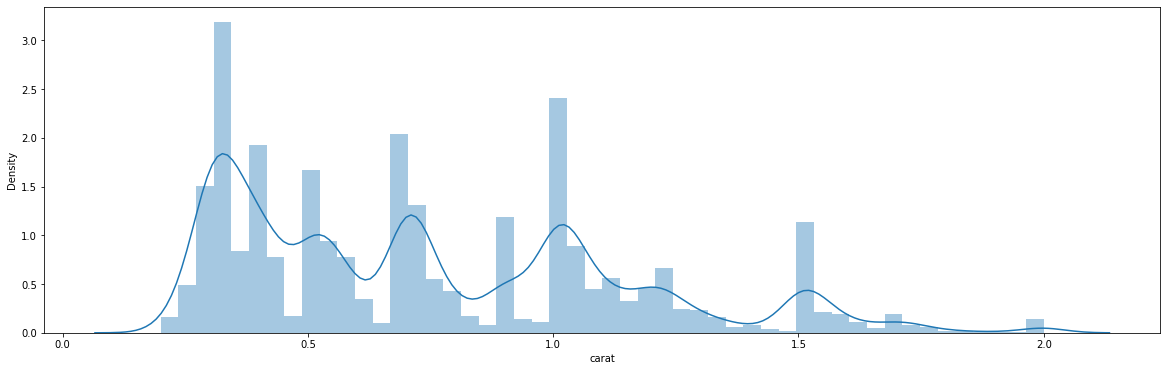

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(df['carat'])
plt.show()

3. *Checking* Normality with QQ Plot

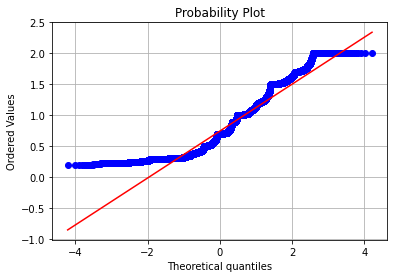

In [ ]:
stats.probplot(df['carat'], dist="norm", plot=plt)

plt.grid()

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747031,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.395094,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.010000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,2.000000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


### 2. **depth**

1. checking for outliers and skewness

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


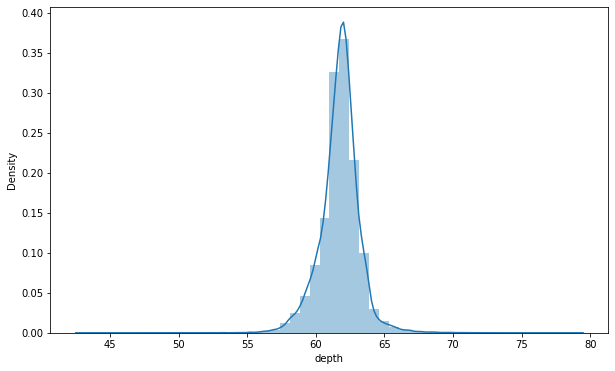

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['depth'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


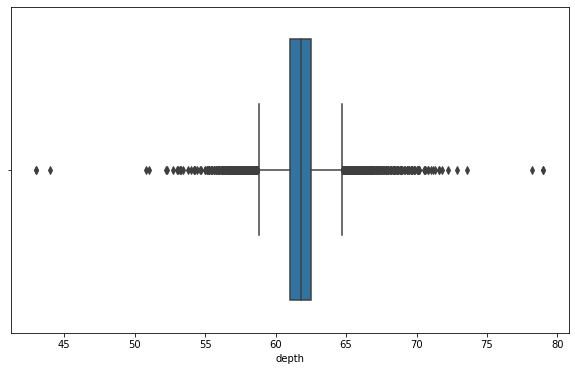

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['depth'])
plt.show()

In [ ]:
print('skewness = ',df['depth'].skew())
print('kurtosis = ',df['depth'].kurt()) 

skewness =  -0.08229402630189467
kurtosis =  5.739414582329394


* there is normal distribution with long tails and there heavy outliers as kurtosis value is greater than 3.

*2. removing Outliers using IQR*

In [ ]:
Q1 = df['depth'].quantile(0.25)
Q3 = df['depth'].quantile(0.75)
IQR = Q3 - Q1 
print(Q3,'-',Q1,'=',IQR)
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

62.5 - 61.0 = 1.5


(58.75, 64.75)

In [ ]:
df.loc[df['depth'] > upper_limit,'depth'] = df['depth'].median()
df.loc[df['depth'] < lower_limit,'depth'] = df['depth'].median()

In [ ]:
print('skewness = ',df['depth'].skew())
print('kurtosis = ',df['depth'].kurt())

skewness =  -0.25953104056350207
kurtosis =  0.13092065497734362


*3. checking the normality by using QQ plot*

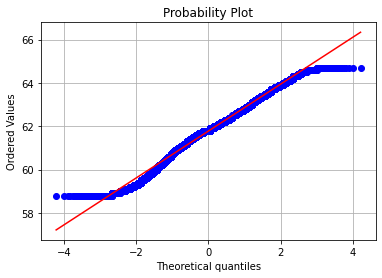

In [ ]:
stats.probplot(df['depth'], dist="norm", plot=plt)

plt.grid()

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747031,61.777488,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.395094,1.090075,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,58.800000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.200000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.010000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,2.000000,64.700000,95.000000,10.740000,58.900000,31.800000,18823.000000


### 3. **Table** 

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


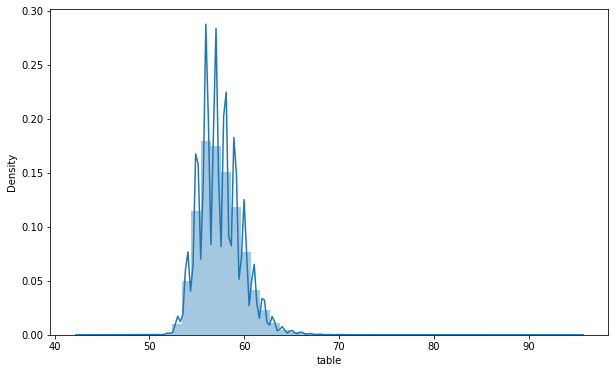

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['table'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


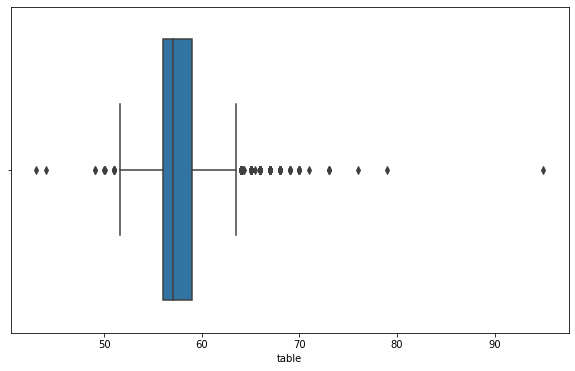

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['table'])
plt.show()

In [ ]:
print('skewness = ',df['table'].skew())
print('kurtosis = ',df['table'].kurt()) 

skewness =  0.7968958486695427
kurtosis =  2.801856860032039


*2. treating outliers using IQR*

In [ ]:
Q1 = df['table'].quantile(0.25)
Q3 = df['table'].quantile(0.75)
IQR = Q3 -Q1
print(Q3,'-',Q1,'=',IQR)
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

59.0 - 56.0 = 3.0


(51.5, 63.5)

In [ ]:
df.loc[df['table']>upper_limit,'table'] = df['table'].median()
df.loc[df['table']<lower_limit,'table'] = df['table'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


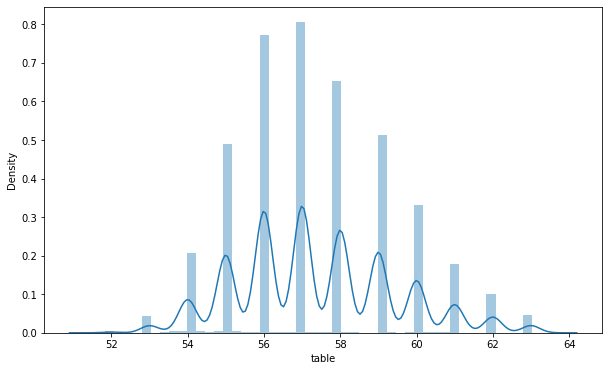

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['table'])
plt.show()

In [ ]:
print('skewness = ',df['table'].skew())
print('kurtosis = ',df['table'].kurt()) 

skewness =  0.3749565707696846
kurtosis =  -0.21429525988178755


*3. checking the normality with QQ plot*

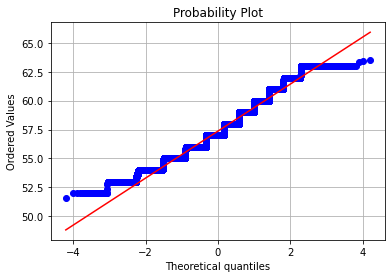

In [ ]:
stats.probplot(df['table'], dist="norm", plot=plt)

plt.grid()

### 4. **x** 

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


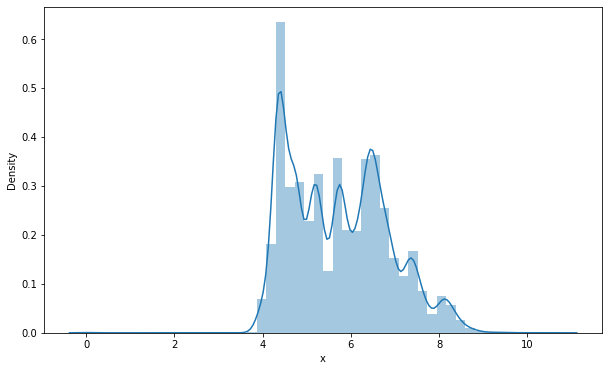

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['x'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


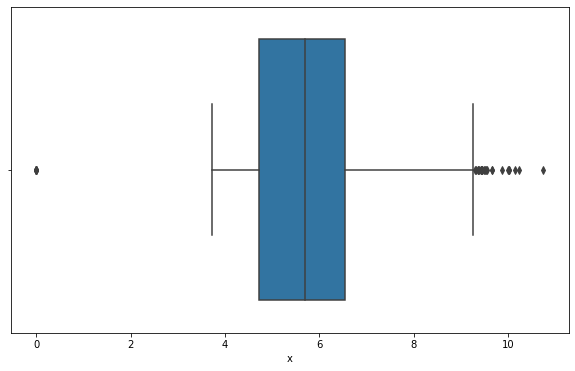

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['x'])
plt.show()

In [ ]:
print('skewness = ',df['x'].skew())
print('kurtosis = ',df['x'].kurt()) 

skewness =  0.3786763426463927
kurtosis =  -0.6181606709137237


*2. Removing outliers using IQR*

In [ ]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)
IQR = Q3 -Q1
print(Q3,'-',Q1,'=',IQR)
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

6.54 - 4.71 = 1.83


(1.9649999999999999, 9.285)

In [ ]:
df.loc[df['x']>upper_limit,'x'] = df['x'].median()
df.loc[df['x']<lower_limit,'x'] = df['x'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


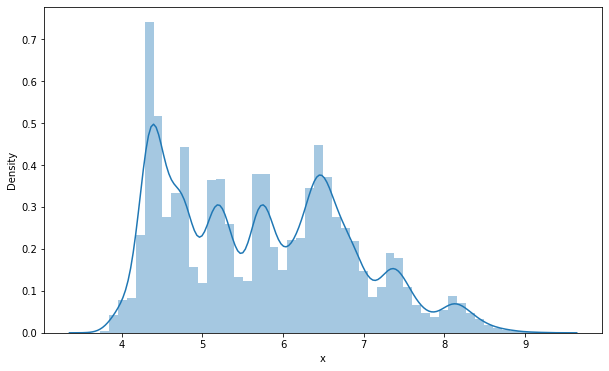

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['x'])
plt.show()

*3. cheching the normality with QQ plot*

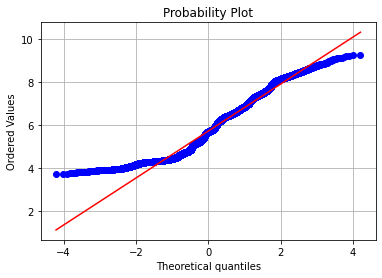

In [ ]:
stats.probplot(df['x'], dist="norm", plot=plt)

plt.grid()

### 5. **y**

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


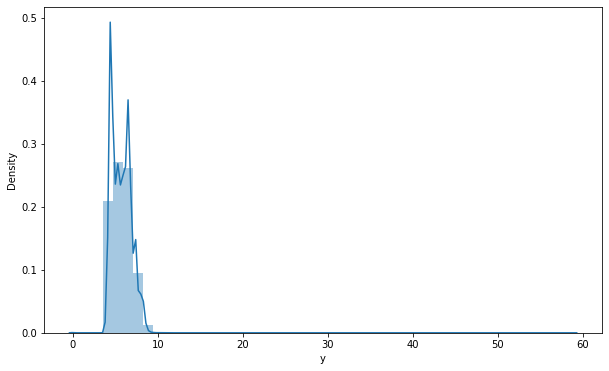

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['y'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


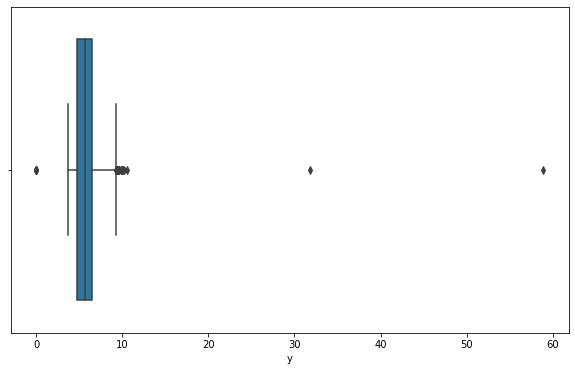

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['y'])
plt.show()

In [ ]:
print('skewness = ',df['y'].skew())
print('kurtosis = ',df['y'].kurt()) 

skewness =  2.4341667164885554
kurtosis =  91.21455715881


*2. removing outliers using IQR*

In [ ]:
Q1 = df['y'].quantile(0.25)
Q3 = df['y'].quantile(0.75)
IQR = Q3 - Q1 
print(Q3,'-',Q1,'=',IQR)
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

6.54 - 4.72 = 1.8200000000000003


(1.9899999999999993, 9.27)

In [ ]:
df.loc[df['y']>upper_limit,'y'] = df['y'].median()
df.loc[df['y']<lower_limit,'y'] = df['y'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


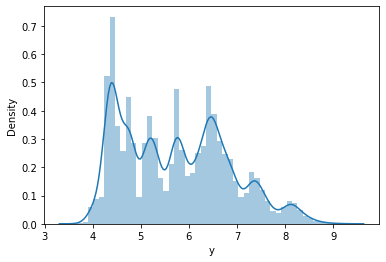

In [ ]:
sns.distplot(df['y'])

In [ ]:
print('skewness = ',df['y'].skew())
print('kurtosis = ',df['y'].kurt()) 

skewness =  0.3829892466210868
kurtosis =  -0.7522270894493102


*3. checking the normality by using QQ plot*

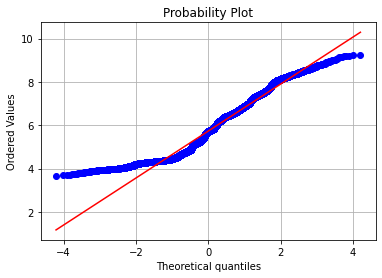

In [ ]:
stats.probplot(df['y'], dist = 'norm', plot = plt)

plt.grid()

### 6. **z** 

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


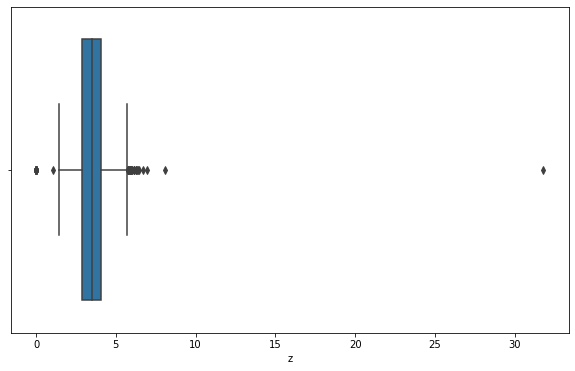

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['z'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


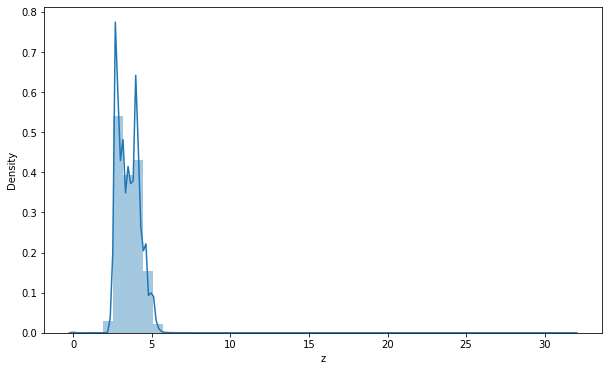

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['z'])
plt.show()

In [ ]:
print('skewness = ',df['z'].skew())
print('kurtosis = ',df['z'].kurt())

skewness =  1.5224225590685583
kurtosis =  47.086619325118086


*2. Removing outliers using IQR*

In [ ]:
Q1 = df['z'].quantile(0.25)
Q3 = df['z'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,'-',Q1,'=',IQR)

lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

4.04 - 2.91 = 1.13


(1.2150000000000003, 5.734999999999999)

In [ ]:
df.loc[df['z']>upper_limit,'z'] = df['z'].median()
df.loc[df['z']<lower_limit,'z'] = df['z'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


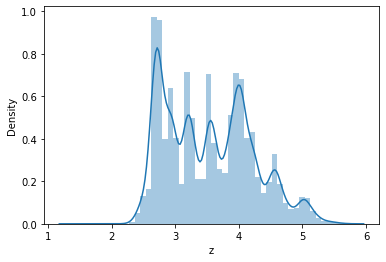

In [ ]:
sns.distplot(df['z'])

In [ ]:
print('skewness = ',df['z'].skew())
print('kurtosis = ',df['z'].kurt()) 

skewness =  0.37910562096189976
kurtosis =  -0.7556569020060371


3. checking for Normality by using QQ plot

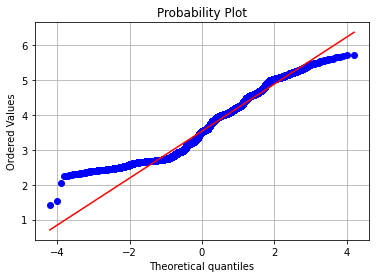

In [ ]:
stats.probplot(df['z'], dist = 'norm', plot = plt)

plt.grid()

### 7. **price**

*1. checking for outliers and skewness*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


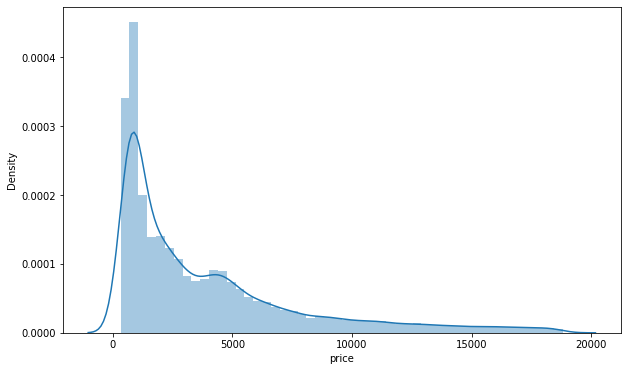

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


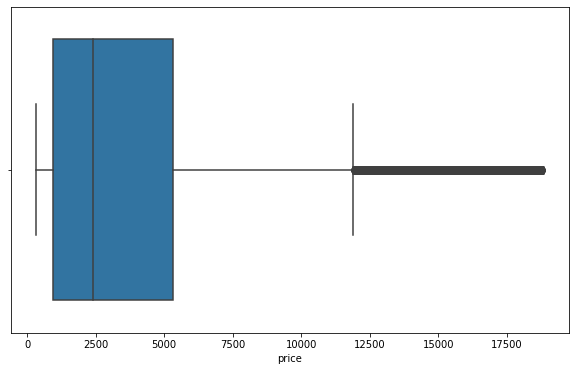

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['price'])
plt.show()

In [ ]:
print('skewness = ',df['z'].skew())
print('kurtosis = ',df['z'].kurt())

skewness =  0.37910562096189976
kurtosis =  -0.7556569020060371


*2. removing outliers using IQR*

In [ ]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print(Q3,'-',Q1,'=',IQR)

lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)
lower_limit, upper_limit

5324.25 - 950.0 = 4374.25


(-5611.375, 11885.625)

In [ ]:
df.loc[df['price']>upper_limit,'price'] = df['price'].median()
df.loc[df['price']<lower_limit,'price'] = df['price'].median()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


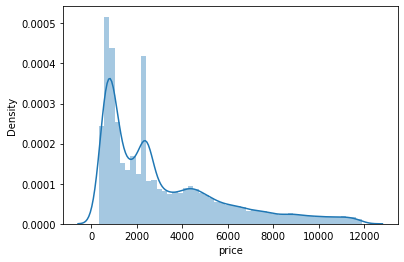

In [ ]:
sns.distplot(df['price'])

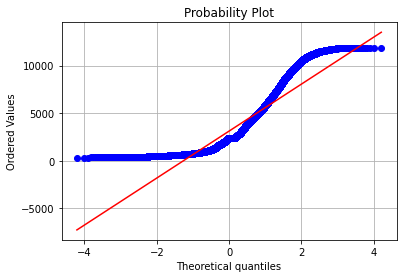

In [ ]:
stats.probplot(df['price'], dist = 'norm', plot = plt)

plt.grid()

In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.747031,61.777488,57.369216,5.730244,5.732341,3.538257,3109.684205
std,0.395094,1.090075,2.063058,1.116502,1.108834,0.689160,2679.029562
min,0.200000,58.800000,51.600000,3.730000,3.680000,1.410000,326.000000
25%,0.400000,61.200000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.010000,62.500000,59.000000,6.540000,6.540000,4.030000,4478.000000
max,2.000000,64.700000,63.500000,9.260000,9.260000,5.730000,11883.000000


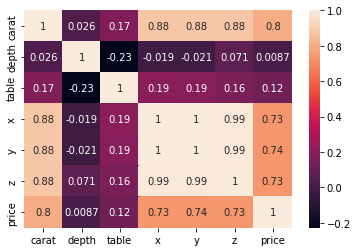

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

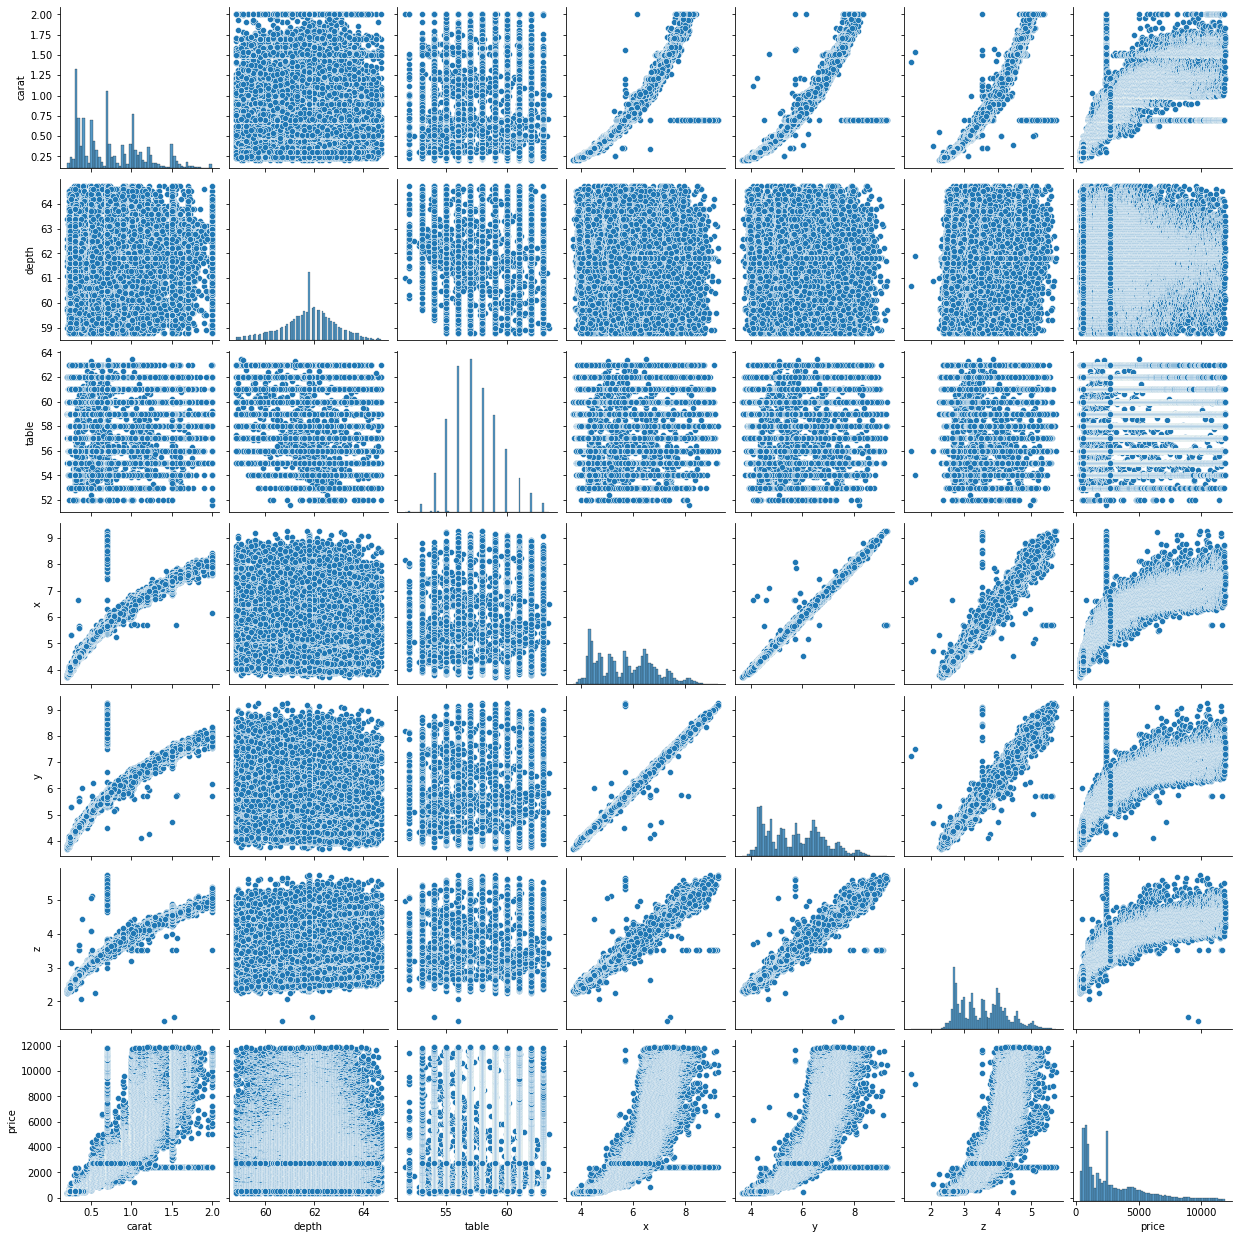

In [ ]:
sns.pairplot(df)

we can observe that the carat, x, y, z have high correlation with the price column.

## 2. Categorical Columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [ ]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

# Data Preprocessing

* *Spliting the DataFrame*

In [ ]:
y = df["price"]
X = df[['carat','cut','color','clarity','x','y','z','depth','table']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
33169,Ideal,D,VS1
53170,Premium,E,SI1
27846,Ideal,D,VS1
20880,Premium,F,VVS2
28554,Premium,H,VS1


In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,x,y,z,depth,table
33169,0.30,4.28,4.33,2.67,61.9,54.1
53170,0.71,5.85,5.74,3.45,59.5,62.0
27846,0.30,4.27,4.31,2.67,62.2,56.0
20880,1.02,6.42,6.37,4.02,62.9,59.0
28554,0.30,4.32,4.30,2.59,60.1,61.0


In [ ]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
33169
53170
27846
20880
28554


In [ ]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].map(cut_encoder)

X_train_cat_le.head()

,cut
33169,4
53170,5
27846,4
20880,5
28554,5


In [ ]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].map(color_encoder)

X_train_cat_le.head()

,cut,color
33169,4,7
53170,5,6
27846,4,7
20880,5,5
28554,5,3


In [ ]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].map(clarity_encoder)

X_train_cat_le.head()

,cut,color,clarity
33169,4,7,5
53170,5,6,3
27846,4,7,5
20880,5,5,6
28554,5,3,5


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,x,y,z,depth,table
33169,-1.129263,-1.297124,-1.263233,-1.258261,0.106716,-1.578379
53170,-0.095656,0.106586,0.006560,-0.128910,-2.093546,2.243334
27846,-1.129263,-1.306065,-1.281244,-1.258261,0.381749,-0.659233
20880,0.685852,0.616213,0.573914,0.696384,1.023492,0.792050
28554,-1.129263,-1.261361,-1.290249,-1.374091,-1.543481,1.759572


In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,x,y,z,depth,table,cut,color,clarity
33169,-1.129263,-1.297124,-1.263233,-1.258261,0.106716,-1.578379,4,7,5
53170,-0.095656,0.106586,0.006560,-0.128910,-2.093546,2.243334,5,6,3
27846,-1.129263,-1.306065,-1.281244,-1.258261,0.381749,-0.659233,4,7,5
20880,0.685852,0.616213,0.573914,0.696384,1.023492,0.792050,5,5,6
28554,-1.129263,-1.261361,-1.290249,-1.374091,-1.543481,1.759572,5,3,5


In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [ ]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,x,y,z,depth,table
52264,0.57,5.35,5.32,3.28,61.5,57.0
21073,1.16,6.75,6.81,4.17,61.5,55.0
42161,0.51,5.05,5.08,3.20,63.2,58.0
35974,0.42,4.83,4.87,2.94,60.6,56.0
7641,0.80,5.89,5.93,3.70,62.6,58.0


In [ ]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,x,y,z,depth,table
52264,-0.448595,-0.340456,-0.371676,-0.375051,-0.259995,-0.175472
21073,1.038791,0.911260,0.970161,0.913567,-0.259995,-1.142994
42161,-0.599854,-0.608681,-0.587811,-0.490882,1.298525,0.308289
35974,-0.826744,-0.805379,-0.776929,-0.867332,-1.085093,-0.659233
7641,0.131234,0.142349,0.177667,0.233061,0.748459,0.308289


In [ ]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,x,y,z,depth,table,cut,color,clarity
52264,-0.448595,-0.340456,-0.371676,-0.375051,-0.259995,-0.175472,4,6,4
21073,1.038791,0.911260,0.970161,0.913567,-0.259995,-1.142994,4,4,5
42161,-0.599854,-0.608681,-0.587811,-0.490882,1.298525,0.308289,4,4,3
35974,-0.826744,-0.805379,-0.776929,-0.867332,-1.085093,-0.659233,4,5,5
7641,0.131234,0.142349,0.177667,0.233061,0.748459,0.308289,5,4,8


In [ ]:
X_train_transformed.head()

,carat,x,y,z,depth,table,cut,color,clarity
33169,-1.129263,-1.297124,-1.263233,-1.258261,0.106716,-1.578379,4,7,5
53170,-0.095656,0.106586,0.006560,-0.128910,-2.093546,2.243334,5,6,3
27846,-1.129263,-1.306065,-1.281244,-1.258261,0.381749,-0.659233,4,7,5
20880,0.685852,0.616213,0.573914,0.696384,1.023492,0.792050,5,5,6
28554,-1.129263,-1.261361,-1.290249,-1.374091,-1.543481,1.759572,5,3,5


# Building K-NN model from scratch and sklearn model

## KNN scratch impelementation

In [ ]:
from tqdm import tqdm

In [ ]:
def Knn_model(X_train_transformed, y_train, X_test_transformed,k):
  x_train_array = np.array(X_train_transformed)
  y_train_array = np.array(y_train)

  y_pred_scratch = np.array([])

  for datapoints in tqdm(X_test_transformed.values):
    distance = np.sqrt((np.square(np.array(datapoints-x_train_array))).sum(axis=1))
    sort_values = np.argsort(distance)
    sort_values = sort_values[:k]
    y_pred_scratch = np.append(y_pred_scratch, y_train_array[sort_values].mean())
  return y_pred_scratch

In [ ]:
y_pred_scratch=Knn_model(X_train_transformed, y_train, X_test_transformed,10)

100%|██████████| 13485/13485 [01:44<00:00, 128.55it/s]


In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted_scratch': y_pred_scratch})

temp_df.head()  

,Actual,Predicted_scratch
52264,2491,1800.3
21073,9248,8213.8
42161,1284,1167.1
35974,921,1037.8
7641,4268,5616.9


In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_scratch))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_scratch))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_scratch)))

Mean Absolute Error:  458.26150537634413
Mean Squared Error:  1094060.7561987394
Root Mean Squared Error:  1045.9735924958811


In [ ]:
print('R square error :', metrics.r2_score(y_test, y_pred_scratch))

R square error : 0.8427207008378755


## KNN implementation using Random Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator = KNeighborsRegressor(), 
    param_distributions = tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=3
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END n_neighbors=34, p=2;, score=(train=0.849, test=0.840) total time=   0.7s
[CV 2/5] END n_neighbors=34, p=2;, score=(train=0.847, test=0.843) total time=   0.8s
[CV 3/5] END n_neighbors=34, p=2;, score=(train=0.847, test=0.847) total time=   0.8s
[CV 4/5] END n_neighbors=34, p=2;, score=(train=0.849, test=0.834) total time=   0.8s
[CV 5/5] END n_neighbors=34, p=2;, score=(train=0.850, test=0.828) total time=   0.8s
[CV 2/5] END n_neighbors=15, p=3;, score=(train=0.852, test=0.836) total time=   5.9s
[CV 3/5] END n_neighbors=15, p=3;, score=(train=0.852, test=0.838) total time=   6.0s
[CV 4/5] END n_neighbors=15, p=3;, score=(train=0.854, test=0.828) total time=   5.8s
[CV 5/5] END n_neighbors=15, p=3;, score=(train=0.855, test=0.821) total time=   5.9s
[CV 1/5] END n_neighbors=13, p=1;, score=(train=0.888, test=0.863) total time=   0.7s
[CV 2/5] END n_neighbors=13, p=1;, score=(train=0.884, test=0.874) total time= 

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=3)

In [ ]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'p': 1, 'n_neighbors': 15}
KNeighborsRegressor(n_neighbors=15, p=1)

Score on Test Data:  0.8605276189886932


In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.058264,0.002010,0.696085,0.018124,2,34,"{'p': 2, 'n_neighbors': 34}",0.839892,0.842791,0.846659,...,0.838211,0.006630,6,0.849403,0.847484,0.847269,0.848784,0.850077,0.848603,0.001084
1,0.059693,0.002067,5.802336,0.110258,3,15,"{'p': 3, 'n_neighbors': 15}",0.834134,0.836221,0.838419,...,0.831406,0.006504,8,0.854548,0.852296,0.851806,0.853780,0.854888,0.853464,0.001218
2,0.059232,0.004881,0.677232,0.017573,1,13,"{'p': 1, 'n_neighbors': 13}",0.863475,0.874458,0.874560,...,0.865947,0.008100,2,0.887578,0.883678,0.883614,0.885127,0.887848,0.885569,0.001834
3,0.055530,0.000872,0.844571,0.021036,2,47,"{'p': 2, 'n_neighbors': 47}",0.836423,0.837692,0.842111,...,0.833036,0.007416,7,0.841272,0.839888,0.839241,0.841216,0.843281,0.840980,0.001389
4,0.057460,0.001790,6.326739,0.139518,3,18,"{'p': 3, 'n_neighbors': 18}",0.833034,0.835276,0.837034,...,0.829963,0.006659,9,0.849354,0.847710,0.847369,0.848730,0.849563,0.848545,0.000873


In [ ]:
cv_results.shape

(10, 22)

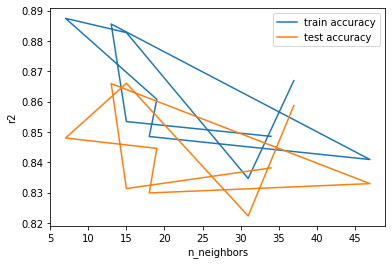

In [ ]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('r2')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

## KNN implementation using grid search cv ( k fold)

In [ ]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Best parameters set found on train set
{'n_neighbors': 10, 'p': 1}
KNeighborsRegressor(n_neighbors=10, p=1)

Score on Test Data:  0.8588917953641625


In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055113,0.000578,0.218904,0.010770,1,1,"{'n_neighbors': 1, 'p': 1}",0.804165,0.811506,0.817881,...,0.800108,0.016449,148,0.999994,0.999996,0.999995,0.999995,0.999994,0.999995,4.690912e-07
1,0.055730,0.003226,0.156691,0.006622,1,2,"{'n_neighbors': 1, 'p': 2}",0.777443,0.799467,0.797304,...,0.777629,0.018609,149,0.999994,0.999996,0.999995,0.999995,0.999994,0.999995,4.690912e-07
2,0.056569,0.004125,1.802446,0.061330,1,3,"{'n_neighbors': 1, 'p': 3}",0.754202,0.779379,0.786567,...,0.759640,0.020045,150,0.999994,0.999996,0.999995,0.999995,0.999994,0.999995,4.690912e-07
3,0.053219,0.000816,0.284642,0.017991,2,1,"{'n_neighbors': 2, 'p': 1}",0.835213,0.850443,0.850620,...,0.839219,0.009438,77,0.950315,0.946034,0.946068,0.949284,0.950195,0.948379,1.934151e-03
4,0.053712,0.000729,0.207831,0.012588,2,2,"{'n_neighbors': 2, 'p': 2}",0.809556,0.840291,0.829621,...,0.821421,0.011688,129,0.943296,0.940019,0.941049,0.943872,0.944321,0.942511,1.678909e-03


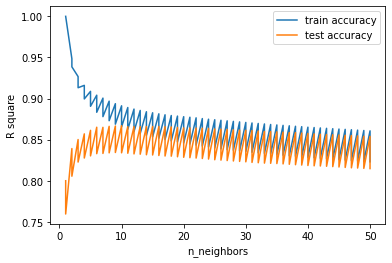

In [ ]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('R square')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 10, p=1)

classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [ ]:
y_test_pred = classifier.predict(X_test_transformed)

In [ ]:
from sklearn import metrics

metrics.r2_score(y_test, y_test_pred)

0.6391403470275749

In [ ]:
tuned_parameters = [{'n_neighbors':[10], 'p':[1]}]

clf = GridSearchCV(
    estimator=KNeighborsRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=3
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END n_neighbors=10, p=1;, score=(train=0.893, test=0.862) total time=   0.7s
[CV 2/5] END n_neighbors=10, p=1;, score=(train=0.889, test=0.876) total time=   0.6s
[CV 3/5] END n_neighbors=10, p=1;, score=(train=0.889, test=0.877) total time=   0.7s
[CV 4/5] END n_neighbors=10, p=1;, score=(train=0.891, test=0.865) total time=   0.7s
[CV 5/5] END n_neighbors=10, p=1;, score=(train=0.893, test=0.856) total time=   0.6s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [10], 'p': [1]}],
             return_train_score=True, scoring='r2', verbose=3)

In [ ]:
print('Score on Test Data: ', clf.score(X_test_transformed, y_test))

Score on Test Data:  0.8588917953641625


In [ ]:
from pickle import dump

dump(scaler, open('standard_scaler.pkl', 'wb'))
dump(clf, open('knn_model.pkl', 'wb'))